# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [5]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [33]:
df.isna().count()

sexo                     16650
posse_de_veiculo         16650
posse_de_imovel          16650
qtd_filhos               16650
tipo_renda               16650
educacao                 16650
estado_civil             16650
tipo_residencia          16650
idade                    16650
tempo_emprego            16650
possui_celular           16650
possui_fone_comercial    16650
possui_fone              16650
possui_email             16650
qt_pessoas_residencia    16650
mau                      16650
dtype: int64

In [20]:
df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

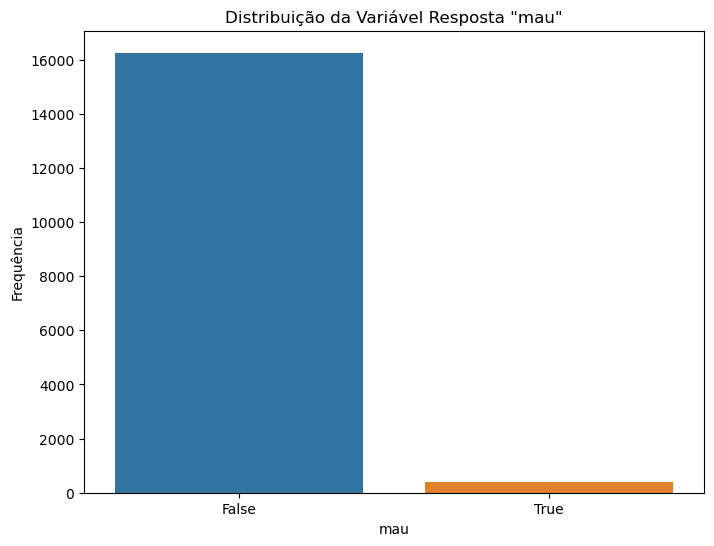

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='mau', data=df)
plt.title('Distribuição da Variável Resposta "mau"')
plt.xlabel('mau')
plt.ylabel('Frequência')
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [37]:
info_variaveis = pd.DataFrame(df.dtypes).reset_index()
info_variaveis.columns = ['Nome Variável', 'Tipo de Dados']

info_variaveis

,Nome Variável,Tipo de Dados
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [40]:
qtd_categorias = []

for coluna in df.columns:
    if df[coluna].dtype == 'object':
        qtd_categorias.append(df[coluna].nunique())
    else:
        qtd_categorias.append(pd.NA)  # ou None

info_variaveis

,Nome Variável,Tipo de Dados
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [73]:
# Criando variáveis dummy para as variáveis categóricas que não estão armazenadas como {0, 1} ou {True, False}
df_dummy = pd.get_dummies(df, columns=['sexo','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)

# Criando um DataFrame apenas com as variáveis apropriadas para entrada no scikit-learn
# Isso envolve manter apenas variáveis numéricas e as variáveis dummy criadas, eliminando variáveis tipo str
df_sklearn_ready = df_dummy.select_dtypes(include=['number', 'bool'])

df_sklearn_ready.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [78]:
tabela_possui_email = pd.crosstab(index=df_sklearn_ready['possui_email'], columns=df_sklearn_ready['mau'], normalize='index')
tabela_possui_email

mau,False,True
possui_email,,
0,0.976269,0.023731
1,0.979730,0.020270


In [77]:
tabela_posse_de_veiculo = pd.crosstab(index=df['posse_de_veiculo'], columns=df['mau'], normalize='index')
tabela_posse_de_veiculo

mau,False,True
posse_de_veiculo,,
N,0.975732,0.024268
Y,0.977905,0.022095


In [ ]:
# Como mostrado acima, o resultado das duas tabelas não mostram uma diferença muito grande no percentual do resultado

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [76]:
df_sklearn_ready.to_csv('df_sklearn_ready.csv')